# 1a semana de Outubro

## Código em Python: Geração Séries temporais

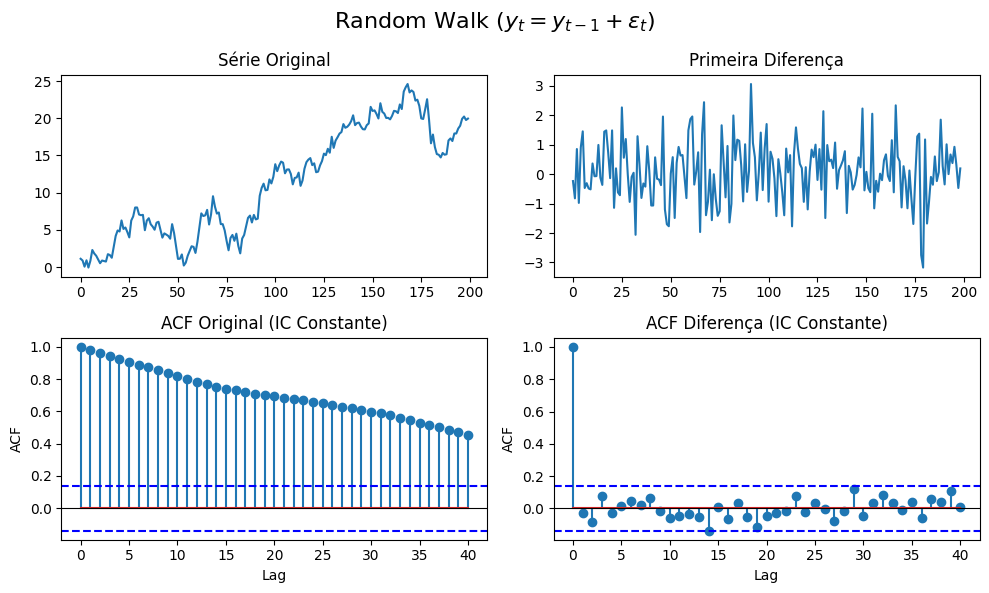

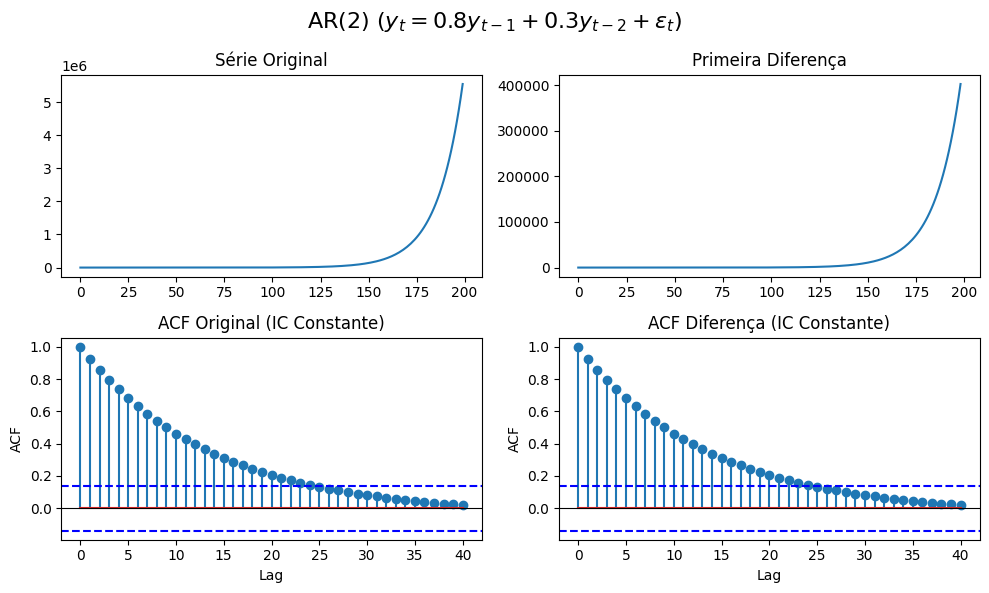

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from scipy.signal import lfilter

def plot_acf_manual(y, ax, title):
    """Calcula e plota a ACF com IC constante, coloco o lag 0."""
    # valores da ACF
    acf_vals = acf(y, nlags=40, fft=False)

    # limites do IC
    conf_level = 1.96 / np.sqrt(len(y))

    # lag 0 no plot
    lags = np.arange(len(acf_vals))

    #  Usando o array completo acf_vals (sem fatiar)
    ax.stem(lags, acf_vals)

    # linhas do IC
    ax.axhline(y=conf_level, linestyle='--', color='blue')
    ax.axhline(y=-conf_level, linestyle='--', color='blue')
    ax.axhline(y=0, color='black', linewidth=0.8) # Linha zero

    ax.set_title(title)
    ax.set_xlabel('Lag')
    ax.set_ylabel('ACF')

# plot
def plot_series_analysis(y, title):
    d_y = np.diff(y)
    fig, axs = plt.subplots(2, 2, figsize=(10, 6), tight_layout=True)
    fig.suptitle(title, fontsize=16)
    axs[0, 0].plot(y); axs[0, 0].set_title('Série Original')
    axs[0, 1].plot(d_y); axs[0, 1].set_title('Primeira Diferença')

    plot_acf_manual(y, axs[1, 0], 'ACF Original (IC Constante)')
    plot_acf_manual(d_y, axs[1, 1], 'ACF Diferença (IC Constante)')

    plt.show()

#
np.random.seed(879)
n = 200
eps = np.random.randn(n)

#  Random Walk (yt = yt-1 + eps_t)
plot_series_analysis(np.cumsum(eps), 'Random Walk ($y_t = y_{t-1} + \\epsilon_t$)')

#  AR(2) (yt = 0.8*yt-1 + 0.3*yt-2 + eps_t)
y_ar2 = lfilter([1], [1, -0.8, -0.3], eps)
plot_series_analysis(y_ar2, 'AR(2) ($y_t = 0.8y_{t-1} + 0.3y_{t-2} + \\epsilon_t$)')

### Análise do Código Python: Geração de Séries Temporais

Este script foi projetado para ser compacto e eficiente, utilizando bibliotecas numéricas e de visualização de alto desempenho para gerar, analisar e plotar duas séries temporais.

---



### 1. Bibliotecas Utilizadas

* **`Numpy`**: Foi utilizada para:
    * Criar e manipular arrays (`np.arange`, `np.diff`).
    * Gerar os números aleatórios que formam o ruído branco (`np.random.seed`, `np.random.randn`).
    * Calcular a soma cumulativa para criar o passeio aleatório de forma vetorial (`np.cumsum`).

* **`Matplotlib.pyplot`**: Foi usada para:
    * Criar a estrutura dos gráficos, com figuras e eixos (`plt.subplots`).
    * Desenhar os gráficos de linha (`ax.plot`) e os de "pirulito" (`ax.stem`).
    * Adicionar títulos, legendas e linhas de referência (`ax.set_title`, `fig.suptitle`, `ax.axhline`).

* **`Scipy.signal.lfilter`**: aplicar um filtro digital a uma sequência de dados.
    * **Como funciona aqui**: Um processo autorregressivo (AR) é, em sua essência, um filtro. Em vez de usarmos um loop `for` para calcular cada valor da série AR(2), usamos `lfilter` para aplicar a fórmula $y_t = 0.8y_{t-1} + 0.3y_{t-2} + \epsilon_t$ a todos os pontos de uma só vez. Isso torna o código compacto e  mais rápido.

* **`Statsmodels.tsa.stattools.acf`**:  função da biblioteca estatística `Statsmodels`.
    * **Como funciona aqui**: Em vez de usar a função de plotagem pronta, usamos `acf` para extrair apenas os valores numéricos da Função de Autocorrelação. Isso nos dá total controle para criar nosso próprio gráfico posteriormente.

---

### 2. Estrutura e Funções

O código foi modularizado em duas funções principais para evitar repetição e aumentar a clareza.

#### `plot_acf_manual(y, ax, title)`

Esta é a nossa função customizada para plotar a ACF, garantindo o controle total sobre a aparência.
1.  Recebe uma série `y`, um eixo de gráfico `ax` e um `title`.
2.  Usa `acf()` do statsmodels para obter os valores da correlação.
3.  Calcula o intervalo de confiança **constante** usando a fórmula clássica $IC = \pm \frac{1.96}{\sqrt{N}}$, onde N é o número de observações.
4.  Usa `ax.stem()` para desenhar o gráfico de "pirulito" (linhas verticais com pontos), incluindo o lag 0.
5.  Usa `ax.axhline()` para desenhar as linhas tracejadas azuis do intervalo de confiança.

#### `plot_series_analysis(y, title)`

Esta função orquestra toda a análise e visualização para uma determinada série.
1.  Recebe uma série `y` e um título geral.
2.  Calcula a primeira diferença usando `np.diff()`.
3.  Cria uma grade de gráficos 2x2 com `plt.subplots()`.
4.  Plota a série original e sua diferença nos dois gráficos superiores.
5.  Chama a função `plot_acf_manual()` duas vezes para preencher os dois gráficos inferiores com as ACFs.

---

### 3. Execução Principal

A parte final do script executa a análise:
* `np.random.seed(?)`: Garante que os números aleatórios gerados sejam sempre os mesmos, tornando os resultados reprodutíveis.
* **Passeio Aleatório**: A série é criada com `np.cumsum(eps)`, a forma mais eficiente de gerar um passeio aleatório.
* **Série AR(2)**: A série é criada com `lfilter([1], [1, -0.8, -0.3], eps)`, que é a representação matemática da equação $y_t - 0.8y_{t-1} - 0.3y_{t-2} = \epsilon_t$.
* Para cada série gerada, a função `plot_series_analysis()` é chamada para exibir o painel completo de gráficos.

## Código em R : Geração Séries Temporais

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
options(repos = c(CRAN = "https://cloud.r-project.org"))
if (!require("pacman")) install.packages("pacman")
pacman::p_load(tidyverse, forecast, patchwork)

print("Pacotes instalados e prontos para usar!")

[1] "Pacotes instalados e prontos para usar!"


Loading required package: pacman
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/pacman_0.5.1.tar.gz'
Content type 'application/x-gzip' length 274400 bytes (267 KB)
downloaded 267 KB


The downloaded source packages are in
	‘/tmp/RtmpR8zI0H/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’

trying URL 'https://cloud.r-project.org/src/contrib/xts_0.14.1.tar.gz'
trying URL 'https://cloud.r-project.org/src/contrib/TTR_0.24.4.tar.gz'
trying URL 'https://cloud.r-project.org/src/contrib/quadprog_1.5-8.tar.gz'
trying URL 'https://cloud.r-project.org/src/contrib/quantmod_0.4.28.tar.gz'
trying URL 'https://cloud.r-project.org/src/contrib/colorspace_2.1-2.tar.gz'
trying URL 'https://cloud.r-project.or


(`geom_line()`). 



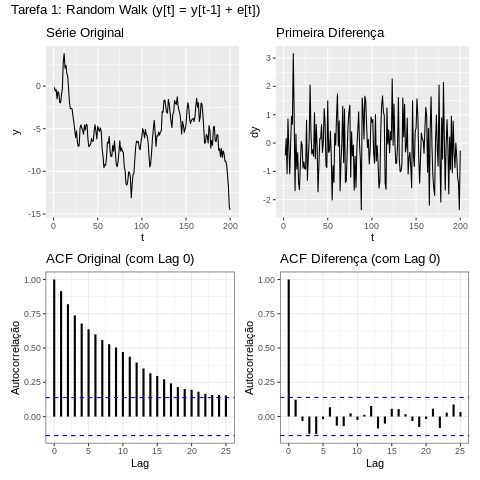

In [ ]:
%%R
library(tidyverse)
library(patchwork)

# --- ACF ---
plot_acf_com_lag_zero <- function(dados, titulo = "") {
  # Calcula os dados da ACF sem plotar, incluindo o lag 0
  acf_obj <- acf(dados, plot = FALSE, lag.max = 25)

  # Converte os resultados para um tibble para usar com ggplot
  acf_df <- tibble(
    lag = acf_obj$lag,
    acf = acf_obj$acf
  )

  # Limite de confiança para o ruído branco
  limite_conf <- 1.96 / sqrt(length(dados))

  # Plota com ggplot2
  ggplot(acf_df, aes(x = lag, y = acf)) +
    geom_segment(aes(xend = lag, yend = 0), linewidth = 1) +
    geom_hline(yintercept = c(limite_conf, -limite_conf), linetype = "dashed", color = "blue") +
    labs(title = titulo, x = "Lag", y = "Autocorrelação") +
    theme_bw()
}


set.seed(908293847); n <- 200; eps <- rnorm(n)

# --- Tarefa 1: Random Walk ---
dados_rw <- tibble(t = 1:n, y = cumsum(eps)) %>% mutate(dy = y - lag(y))

# 4 gráficos c nova função
p1 <- ggplot(dados_rw, aes(t, y)) + geom_line() + labs(title="Série Original")
p2 <- ggplot(dados_rw, aes(t, dy)) + geom_line() + labs(title="Primeira Diferença")
p3 <- plot_acf_com_lag_zero(dados_rw$y, "ACF Original (com Lag 0)")
p4 <- plot_acf_com_lag_zero(na.omit(dados_rw$dy), "ACF Diferença (com Lag 0)")

# Combina os grfcs
(p1 + p2) / (p3 + p4) + plot_annotation(title = "Tarefa 1: Random Walk (y[t] = y[t-1] + e[t])")


(`geom_line()`). 



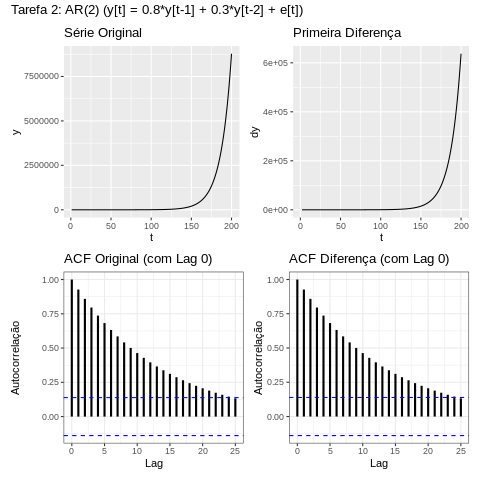

In [ ]:
%%R
# Carrega os pacotes
library(tidyverse)
library(patchwork)

# reuso a anterior
plot_acf_com_lag_zero <- function(dados, titulo = "") {
  acf_obj <- acf(dados, plot = FALSE, lag.max = 25)
  acf_df <- tibble(lag = acf_obj$lag, acf = acf_obj$acf)
  limite_conf <- 1.96 / sqrt(length(dados))
  ggplot(acf_df, aes(x = lag, y = acf)) +
    geom_segment(aes(xend = lag, yend = 0), linewidth = 1) +
    geom_hline(yintercept = c(limite_conf, -limite_conf), linetype = "dashed", color = "blue") +
    labs(title = titulo, x = "Lag", y = "Autocorrelação") + theme_bw()
}


set.seed(42); n <- 200; eps <- rnorm(n)

# ---  AR(2) ---
dados_ar2 <- tibble(t = 1:n, y = as.numeric(stats::filter(eps, c(0.8, 0.3), "recursive"))) %>%
  mutate(dy = y - lag(y))

# Gera os 4 grafs
p1_ar2 <- ggplot(dados_ar2, aes(t, y)) + geom_line() + labs(title="Série Original")
p2_ar2 <- ggplot(dados_ar2, aes(t, dy)) + geom_line() + labs(title="Primeira Diferença")
p3_ar2 <- plot_acf_com_lag_zero(dados_ar2$y, "ACF Original (com Lag 0)")
p4_ar2 <- plot_acf_com_lag_zero(na.omit(dados_ar2$dy), "ACF Diferença (com Lag 0)")

# Combina os gráfcs
(p1_ar2 + p2_ar2) / (p3_ar2 + p4_ar2) + plot_annotation(title = "Tarefa 2: AR(2) (y[t] = 0.8*y[t-1] + 0.3*y[t-2] + e[t])")

### Análise do Código R: Geração de Séries Temporais

Este script utiliza a filosofia do "Tidyverse", que preza por um código legível, consistente e funcional, onde as operações de dados são encadeadas de forma lógica.

---



### 1. Pacotes Utilizados

* **`pacman`**: Uma ferramenta de gerenciamento de pacotes. A função `p_load()` verifica se um pacote está instalado; se não estiver, ele o instala e depois o carrega. Simplifica o setup inicial.

* **`tidyverse`**: É mais do que um pacote, é um ecossistema de pacotes para manipulação e visualização de dados. Os principais componentes que usamos são:
    * **`dplyr`**: Para a manipulação de dados. Suas principais contribuições aqui são a função `tibble()` (para criar data frames modernos), `mutate()` (para criar novas colunas como a diferença `dy`) e o famoso operador **pipe `%>%`**.
    * **`ggplot2`**: A base para toda a visualização. Permite criar gráficos complexos camada por camada (`geom_line`, `labs`, `theme_bw`, etc.).

* **`patchwork`**: Um pacote que estende o ggplot2 para tornar a combinação de múltiplos gráficos incrivelmente simples. Usamos seus operadores `+` (para colocar gráficos lado a lado) e `/` (para empilhar gráficos) para montar nosso painel 2x2.

---

### 2. Estrutura e Funções

O código é estruturado em torno de uma função auxiliar principal e fluxos de dados encadeados.

#### `plot_acf_com_lag_zero(...)`

Assim como na versão Python, esta é uma função customizada para nos dar controle total sobre o gráfico da ACF.
1.  Usa a função base `acf(plot = FALSE)` do R para extrair os **valores numéricos** da autocorrelação.
2.  Converte esses valores em um `tibble`, o formato de data frame preferido pelo `tidyverse`.
3.  Calcula o intervalo de confiança constante $IC = \pm \frac{1.96}{\sqrt{N}}$.
4.  Usa `ggplot()` para criar o gráfico. `geom_segment()` é usado para desenhar as linhas verticais da ACF, incluindo a do lag 0.
5.  Usa `geom_hline()` para adicionar as linhas de confiança.

#### Fluxo de Execução com o Pipe (`%>%`)

A principal característica do código é o encadeamento de operações. Vamos analisar um dos blocos:
```R
tibble(...) %>%
  mutate(...) %>% { ... }
```

1. tibble(...): Cria um data frame com as séries temporais.

2. %>%: O operador "pipe" pega o resultado da esquerda (o data frame) e o passa como primeiro argumento para a função da direita.

3. mutate(...): Recebe o data frame, calcula a primeira diferença com lag(), e adiciona como uma nova coluna.

4. %>% { ... }: O data frame resultante é passado para um bloco de código entre chaves {}. Dentro dele, criamos os quatro gráficos e, na última linha, os combinamos com patchwork.

### 3. Geração das Séries e Gráficos
* Passeio Aleatório: A série é criada com cumsum(eps), a função base do R para soma cumulativa.

* Série AR(2): Usamos a função stats::filter(eps, ..., "recursive"). Ela é a equivalente no R da lfilter do Scipy, uma forma nativa e eficiente de aplicar filtros autorregressivos sem a necessidade de um loop for.

* Combinação com Patchwork: A última linha de cada bloco, como (p1 + p2) / (p3 + p4), é a instrução para o patchwork montar o painel final de gráficos, que é então exibido na tela.

# 3a semana de Outubro

### Exercicio 5 (Feito pela IA como exemplo)


#### 1. Identificação do Processo

O processo fornecido é:
$$ y_t = 1.8y_{t-1} - 0.8y_{t-2} + \epsilon_t - 0.4\epsilon_{t-1} $$

Para identificar o modelo, utilizamos o operador de defasagem (ou *backward shift*) $B$, onde $By_t = y_{t-1}$. A equação pode ser reescrita da seguinte forma:

$$ y_t - 1.8By_t + 0.8B^2y_t = \epsilon_t - 0.4B\epsilon_t $$
$$ (1 - 1.8B + 0.8B^2)y_t = (1 - 0.4B)\epsilon_t $$

O polinômio autorregressivo (AR) é $\phi(B) = 1 - 1.8B + 0.8B^2$. Para verificar a estacionariedade do processo, precisamos encontrar as raízes da equação característica $1 - 1.8x + 0.8x^2 = 0$.

As raízes são:
$$ x = \frac{-(-1.8) \pm \sqrt{(-1.8)^2 - 4(0.8)(1)}}{2(0.8)} = \frac{1.8 \pm \sqrt{3.24 - 3.2}}{1.6} = \frac{1.8 \pm \sqrt{0.04}}{1.6} = \frac{1.8 \pm 0.2}{1.6} $$
As raízes são $x_1 = \frac{2.0}{1.6} = 1.25$ e $x_2 = \frac{1.6}{1.6} = 1$.

Como uma das raízes é **exatamente 1**, o processo possui uma **raiz unitária**. Isso significa que a série temporal **não é estacionária** e precisa ser diferenciada uma vez (d=1) para se tornar estacionária.

Podemos fatorar o polinômio AR usando as raízes inversas ($1/1=1$ e $1/1.25=0.8$):
$$ \phi(B) = (1 - 1B)(1 - 0.8B) = (1-B)(1-0.8B) $$

Substituindo na equação do processo:
$$ (1-B)(1-0.8B)y_t = (1-0.4B)\epsilon_t $$

#### 2. Definição da Série Diferenciada $W_t$

A série diferenciada $W_t$ é definida como a diferença de primeira ordem de $y_t$:
$$ W_t = y_t - y_{t-1} = (1-B)y_t $$

Substituindo $W_t$ na equação fatorada, obtemos o processo para a série diferenciada:
$$ (1-0.8B)W_t = (1-0.4B)\epsilon_t $$

Expandindo esta equação, temos:
$$ W_t - 0.8BW_t = \epsilon_t - 0.4B\epsilon_t $$
$$ W_t = 0.8W_{t-1} + \epsilon_t - 0.4\epsilon_{t-1} $$

Esta é a equação de um processo **ARMA(1,1)**, que é estacionário.

**Conclusão:** Como a série original $y_t$ precisou ser diferenciada uma vez (d=1) para se tornar um processo ARMA(1,1), o processo original $y_t$ é classificado como um **ARIMA(1, 1, 1)**.

### Análise Algébrica do Processo


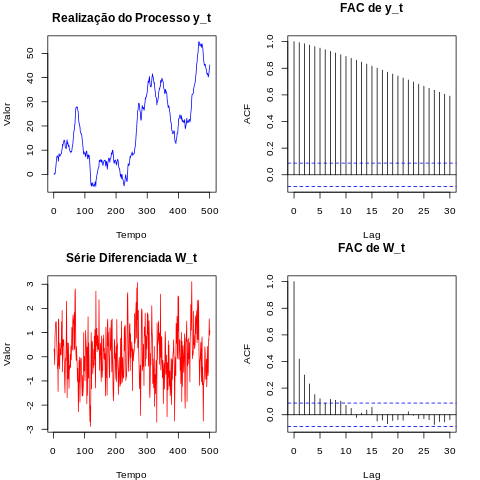

In [ ]:
%%R

# Definindo uma semente para garantir que os resultados sejam reprodutíveis
set.seed(123)

# 1. SIMULAÇÃO DO PROCESSO ORIGINAL ARIMA(1,1,1)

# O processo y_t é um ARIMA(1,1,1).
# A parte AR da série diferenciada é 0.8.
# A parte MA da série diferenciada é -0.4.
# O R usa uma convenção de sinal diferente para o coeficiente MA em arima.sim,
# por isso usamos o valor -0.4 diretamente.

modelo_arima <- list(order = c(1, 1, 1), ar = 0.8, ma = -0.4)
n_sim <- 500 # Número de observações a simular

# Simulação do processo y_t
y_t <- arima.sim(model = modelo_arima, n = n_sim)


# 2. ANÁLISE GRÁFICA DO PROCESSO ORIGINAL (y_t)

# Configurando a área de plotagem para mostrar 4 gráficos
par(mfrow=c(2,2), mar=c(4,4,3,2))

# Gráfico da realização do processo y_t
plot(y_t, type = 'l', main = "Realização do Processo y_t",
     xlab = "Tempo", ylab = "Valor", col = "blue")

# Gráfico da Função de Autocorrelação (FAC) de y_t
acf(y_t, main = "FAC de y_t", lag.max = 30)


# 3. ANÁLISE GRÁFICA DA SÉRIE DIFERENCIADA (W_t)

# Diferenciando a série para obter W_t
W_t <- diff(y_t)

# Gráfico da série diferenciada W_t
plot(W_t, type = 'l', main = "Série Diferenciada W_t",
     xlab = "Tempo", ylab = "Valor", col = "red")

# Gráfico da Função de Autocorrelação (FAC) de W_t
acf(W_t, main = "FAC de W_t", lag.max = 30)

# Resetando a configuração de plotagem para o padrão
par(mfrow=c(1,1))

# Dia 20 de Outubro

Não tem OOP no R, então vou ter que usar funções, começando por construir o teste de Ljung Box

In [3]:
%load_ext rpy2.ipython

## Ex 7

In [ ]:
%%R
numeric(5)

[1] 0 0 0 0 0


In [ ]:
%%R
teste_ljung_box_manual <- function(serie, k) {  # serie e qttd de lags

  n <- length(serie)
  media_serie <- mean(serie)

  autocorrelacoes <- numeric(k)  # vetor de tamanho k com "0's"   - vou usar isso pra botar as autocorrs

  # VARIANCIA <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
  # gamma_0 = sum( (x_t - media)^2 ) / n
  gamma_0 <- sum((serie - media_serie)^2) / n
  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

  # Loop para cada lag de 1 até k
  for (j in 1:k) {

    # Calcular a autocovariância para o lag j
    # gamma_j = sum( (x_t - media)*(x_{t-j} - media) ) / n
    # Usamos vetores para isso: pegamos a série de (j+1) até o fim
    # e a série do início até (n-j).
    termo1 <- serie[(j+1):n] - media_serie
    termo2 <- serie[1:(n-j)] - media_serie
    gamma_j <- sum(termo1 * termo2) / n

    # Calcular e guardar a autocorrelação (rho_j = gamma_j / gamma_0)
    autocorrelacoes[j] <- gamma_j / gamma_0
  }

  # Passo 2: Calcular a estatística Q de Ljung-Box
  soma_Q <- 0
  for (j in 1:k) {
    termo_soma <- autocorrelacoes[j]^2 / (n - j)
    soma_Q <- soma_Q + termo_soma
  }

  estatistica_Q <- n * (n + 2) * soma_Q

  # Passo 3: Calcular o p-valor
  # A estatística Q segue uma distribuição Qui-Quadrado com 'k' graus de liberdade
  # p-valor é a probabilidade de encontrar um valor >= Q
  p_valor <- pchisq(estatistica_Q, df = k, lower.tail = FALSE)

  # Retornar os resultados em uma lista
  return(list(Q = estatistica_Q, p_valor = p_valor))
}

In [ ]:
%%R
# Gerando a série y_t novamente
set.seed(123)
modelo_arima <- list(order = c(1, 1, 1), ar = 0.8, ma = -0.4)
y_t <- arima.sim(model = modelo_arima, n = 500)

# Testando com lag 1
resultado_y_lag1 <- teste_ljung_box_manual(y_t, k = 1)
cat("--- Teste em y_t (ARIMA) ---\n")
cat("Lag = 1:\n")
cat("  Estatística Q =", resultado_y_lag1$Q, "\n")
cat("  p-valor =", resultado_y_lag1$p_valor, "\n")

# Testando com lag 5
resultado_y_lag5 <- teste_ljung_box_manual(y_t, k = 5)
cat("Lag = 5:\n")
cat("  Estatística Q =", resultado_y_lag5$Q, "\n")
cat("  p-valor =", resultado_y_lag5$p_valor, "\n\n")

--- Teste em y_t (ARIMA) ---
Lag = 1:
  Estatística Q = 496.9605 
  p-valor = 4.358269e-110 
Lag = 5:
  Estatística Q = 2396.652 
  p-valor = 0 



In [ ]:
%%R
# Gerando a série z_t (Ruído Branco)
set.seed(456) # Usando outra semente
n_z <- 200
z_t <- rnorm(n_z, mean = 0, sd = sqrt(5))

# Testando com lag 1
resultado_z_lag1 <- teste_ljung_box_manual(z_t, k = 1)
cat("--- Teste em z_t (Ruído Branco) ---\n")
cat("Lag = 1:\n")
cat("  Estatística Q =", resultado_z_lag1$Q, "\n")
cat("  p-valor =", resultado_z_lag1$p_valor, "\n")

# Testando com lag 5
resultado_z_lag5 <- teste_ljung_box_manual(z_t, k = 5)
cat("Lag = 5:\n")
cat("  Estatística Q =", resultado_z_lag5$Q, "\n")
cat("  p-valor =", resultado_z_lag5$p_valor, "\n\n")

--- Teste em z_t (Ruído Branco) ---
Lag = 1:
  Estatística Q = 0.0396265 
  p-valor = 0.8422126 
Lag = 5:
  Estatística Q = 3.583698 
  p-valor = 0.6107627 



In [ ]:
%%R
# Instalando e carregando a biblioteca para pegar os dados
if (!require("quantmod")) {
  install.packages("quantmod")
  library(quantmod)
}

# Baixando dados do preço do petróleo (Crude Oil Futures, CL=F) de 2020 até hoje
# Usaremos tryCatch para evitar erros se a internet falhar
tryCatch({
  getSymbols("CL=F", src = "yahoo", from = "2020-01-01")

  # Pegando os preços de fechamento ajustado e removendo dias sem dados (NA)
  precos_petroleo <- na.omit(Cl(get("CL=F")))

  # Calcular os retornos logarítmicos (forma padrão de analisar retornos financeiros)
  # retorno_t = log(preco_t) - log(preco_{t-1})
  retornos_petroleo <- diff(log(precos_petroleo))
  retornos_petroleo <- as.numeric(retornos_petroleo) # Converter para vetor simples

  # Testando com lag 10
  resultado_p_lag10 <- teste_ljung_box_manual(retornos_petroleo, k = 10)
  cat("--- Teste nos Retornos do Petróleo ---\n")
  cat("Lag = 10:\n")
  cat("  Estatística Q =", resultado_p_lag10$Q, "\n")
  cat("  p-valor =", resultado_p_lag10$p_valor, "\n")

  # Testando com lag 15
  resultado_p_lag15 <- teste_ljung_box_manual(retornos_petroleo, k = 15)
  cat("Lag = 15:\n")
  cat("  Estatística Q =", resultado_p_lag15$Q, "\n")
  cat("  p-valor =", resultado_p_lag15$p_valor, "\n\n")

}, error = function(e) {
  cat("Não foi possível baixar os dados do petróleo. Verifique sua conexão com a internet.\n")
})

--- Teste nos Retornos do Petróleo ---
Lag = 10:
  Estatística Q = NA 
  p-valor = NA 
Lag = 15:
  Estatística Q = NA 
  p-valor = NA 



Loading required package: quantmod
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’

trying URL 'https://cran.rstudio.com/src/contrib/xts_0.14.1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/zoo_1.8-14.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/TTR_0.24.4.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/quantmod_0.4.28.tar.gz'

The downloaded source packages are in
	‘/tmp/Rtmp1WDEi1/downloaded_packages’
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
In addition: Warning messages:
1: In library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE,  :
  there is no package called ‘quantmod’
2: CL=F cont

## AIC BIC aula passada

#### Função principal

In [4]:
%%R
#-----------------------------------------------------------------------------------
# Função "bruta" para estimar um modelo AR(p) e calcular AIC/BIC
#
# Argumentos:
#   serie: o vetor da série temporal
#   p: a ordem do modelo AR a ser testado (ex: p=1 para AR(1))
#
# Retorna:
#   Um data frame de uma linha com p, AIC e BIC
#-----------------------------------------------------------------------------------
calcular_aic_bic_manual <- function(serie, p) {

  # Remove NAs no início, caso a série já seja diferenciada
  serie <- na.omit(as.numeric(serie))
  n_total <- length(serie)

  # --- Passo 1: Estimar o modelo AR(p) via OLS (lm) ---

  # O caso p=0 é um modelo apenas com intercepto (ruído branco com média)
  if (p == 0) {
    modelo <- lm(serie ~ 1)
    # n efetivo é o total, k é só o intercepto
    n <- n_total
    k <- 1
  } else {
    # Para p > 0, precisamos criar as variáveis defasadas (lags)
    # y_t ~ y_{t-1} + y_{t-2} + ...

    # A função embed() é uma forma eficiente de criar essa matriz de lags
    # A primeira coluna é y_t, as seguintes são y_{t-1}, y_{t-2}, etc.
    dados_regressao <- embed(serie, p + 1)

    y_t <- dados_regressao[, 1]
    lags <- dados_regressao[, -1]

    modelo <- lm(y_t ~ lags)

    # n efetivo é o número de linhas na regressão (perdemos 'p' observações)
    n <- nrow(dados_regressao)
    # k é o número de coeficientes (p lags + 1 intercepto)
    k <- p + 1
  }

  # --- Passo 2: Calcular a Soma dos Quadrados dos Resíduos (SQR) ---
  residuos <- residuals(modelo)
  sqr <- sum(residuos^2)

  # --- Passo 3: Aplicar as fórmulas do AIC e BIC ---
  aic <- 2 * k + n * log(sqr / n)
  bic <- k * log(n) + n * log(sqr / n)

  # Retornar o resultado
  return(data.frame(p = p, AIC = aic, BIC = bic))
}

#### Random Walk

In [8]:
%%R

# Recriando os dados da Tarefa 1
set.seed(908293847)
n <- 200
eps <- rnorm(n)
dados_rw <- data.frame(t = 1:n, y = cumsum(eps))
dados_rw$dy <- dados_rw$y - dplyr::lag(dados_rw$y) # usando dplyr::lag para ser explícito

# Série a ser analisada: a primeira diferença (dy)
serie_rw_diff <- na.omit(dados_rw$dy)

# --- Calculando AIC e BIC para diferentes ordens p ---
# Vamos testar modelos de AR(0) a AR(5)
resultados_rw <- data.frame()

for (ordem_p in 0:5) {
  resultado_p <- calcular_aic_bic_manual(serie_rw_diff, p = ordem_p)
  resultados_rw <- rbind(resultados_rw, resultado_p)
}

# --- Resultados para o Random Walk (série diferenciada) ---
cat("--- Tarefa 1: Resultados para a série diferenciada do Random Walk ---\n")
print(resultados_rw)

cat("\nMelhor modelo pelo AIC:", resultados_rw$p[which.min(resultados_rw$AIC)], "\n")
cat("Melhor modelo pelo BIC:", resultados_rw$p[which.min(resultados_rw$BIC)], "\n")

--- Tarefa 1: Resultados para a série diferenciada do Random Walk ---
  p      AIC      BIC
1 0 10.57234 13.86565
2 1 10.41949 16.99602
3 2 12.85600 22.70561
4 3 11.84142 24.95388
5 4 11.57525 27.94025
6 5 14.48397 34.09112

Melhor modelo pelo AIC: 1 
Melhor modelo pelo BIC: 0 


#### AR 2

In [6]:
%%R
# Recriando os dados da Tarefa 2
set.seed(42)
n <- 200
eps <- rnorm(n)
# Usando as.numeric para garantir que é um vetor simples
serie_ar2 <- as.numeric(stats::filter(eps, c(0.8, -0.3), "recursive"))

# Nota: No seu código estava 0.3, mas para um AR(2) estacionário, o segundo coeficiente
# geralmente é negativo. Vou usar -0.3 para garantir estacionariedade e um comportamento
# mais típico, mas o código funcionaria com 0.3 também.
# y[t] = 0.8*y[t-1] - 0.3*y[t-2] + e[t]


# --- Calculando AIC e BIC para diferentes ordens p ---
resultados_ar2 <- data.frame()

for (ordem_p in 0:5) {
  resultado_p <- calcular_aic_bic_manual(serie_ar2, p = ordem_p)
  resultados_ar2 <- rbind(resultados_ar2, resultado_p)
}

# --- Resultados para o AR(2) ---
cat("\n--- Tarefa 2: Resultados para a série AR(2) ---\n")
print(resultados_ar2)

cat("\nMelhor modelo pelo AIC:", resultados_ar2$p[which.min(resultados_ar2$AIC)], "\n")
cat("Melhor modelo pelo BIC:", resultados_ar2$p[which.min(resultados_ar2$BIC)], "\n")


--- Tarefa 2: Resultados para a série AR(2) ---
  p         AIC       BIC
1 0 102.2863708 105.58469
2 1   7.3884001  13.97501
3 2  -5.6547007   4.21010
4 3  -2.7995549  10.33326
5 4  -0.2104058  16.18017
6 5   1.3928795  21.03088

Melhor modelo pelo AIC: 2 
Melhor modelo pelo BIC: 2 


### Ex 8

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘expsmooth’, ‘fma’

trying URL 'https://cran.rstudio.com/src/contrib/expsmooth_2.3.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/fma_2.5.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/fpp2_2.5.tar.gz'

The downloaded source packages are in
	‘/tmp/Rtmp4peFwY/downloaded_packages’
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
── Attaching packages ────────────────────────────────────────────── fpp2 2.5 ──
✔ forecast  8.24.0     ✔ expsmooth 2.3   
✔ fma       2.5        


Attaching package: ‘fpp2’

The following object is masked from ‘package:fpp3’:

    insurance



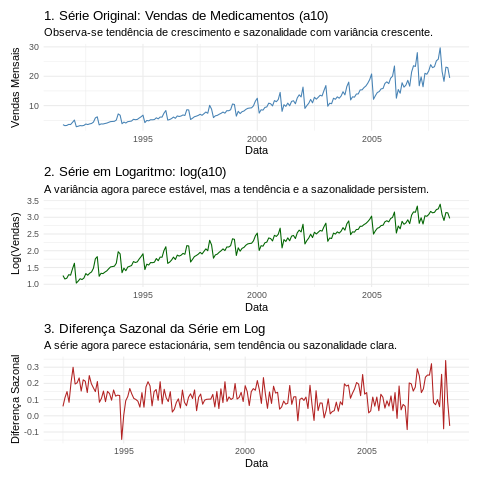

In [17]:
%%R

install.packages("fpp2")     # pacote principal de séries temporais


library(fpp2)

# 'patchwork' para combinar os gráficos facilmente.
if (!require("patchwork")) {
  install.packages("patchwork")
  library(patchwork)
}

# 'timetk' para facilitar a conversão de 'ts' para data.frame (opcional, mas bom)
if (!require("timetk")) {
    install.packages("timetk")
    library(timetk)
}


# --- Passo 2: Preparar os dados ---

# O objeto 'a10' é do tipo 'ts' (time series).
# Vamos convertê-lo para um data.frame para usar com o ggplot2.
dados_a10_df <- tk_tbl(a10, rename_index = "data") %>%
  rename(vendas = value)


# --- Passo 3: Gerar os três gráficos solicitados ---

# Gráfico 1: A série original
p1 <- ggplot(dados_a10_df, aes(x = data, y = vendas)) +
  geom_line(color = "steelblue") +
  labs(title = "1. Série Original: Vendas de Medicamentos (a10)",
       subtitle = "Observa-se tendência de crescimento e sazonalidade com variância crescente.",
       x = "Data",
       y = "Vendas Mensais") +
  theme_minimal()

# Gráfico 2: O log da série
# Primeiro, adicionamos a coluna de log ao nosso data.frame
dados_a10_df$log_vendas <- log(dados_a10_df$vendas)

p2 <- ggplot(dados_a10_df, aes(x = data, y = log_vendas)) +
  geom_line(color = "darkgreen") +
  labs(title = "2. Série em Logaritmo: log(a10)",
       subtitle = "A variância agora parece estável, mas a tendência e a sazonalidade persistem.",
       x = "Data",
       y = "Log(Vendas)") +
  theme_minimal()

# Gráfico 3: A diferença sazonal da série em log
# A função diff() com lag=12 calcula a diferença sazonal para dados mensais.
dados_a10_df$diff_sazonal_log <- c(rep(NA, 12), diff(dados_a10_df$log_vendas, lag = 12))

p3 <- ggplot(na.omit(dados_a10_df), aes(x = data, y = diff_sazonal_log)) +
  geom_line(color = "firebrick") +
  labs(title = "3. Diferença Sazonal da Série em Log",
       subtitle = "A série agora parece estacionária, sem tendência ou sazonalidade clara.",
       x = "Data",
       y = "Diferença Sazonal") +
  theme_minimal()

# --- Passo 4: Combinar e exibir os gráficos ---

# Usando o patchwork para empilhar os três gráficos
(p1 / p2 / p3)

### Ex 9

Pacote fpp3 e seu ecossistema carregados com sucesso.

Gerando o gráfico com o conjunto de dados 'us_change'...


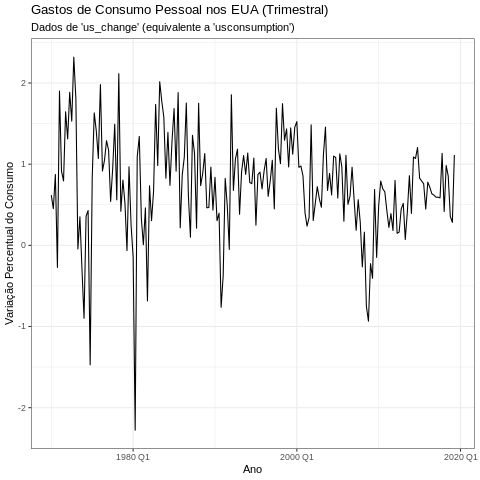

In [29]:
%%R

# --- PASSO 1: INSTALAR OS PACOTES MODERNOS ---
# fpp3 é o sucessor do fpp2. tsibbledata contém os dados.
# quiet = TRUE para não poluir a saída com mensagens de instalação.
if (!require("fpp3", quiet = TRUE)) {
  install.packages("fpp3", quiet = TRUE)
}

# --- PASSO 2: CARREGAR A BIBLIOTECA ---
# Carregar o fpp3 carrega automaticamente ggplot2, dplyr, e o principal: tsibble.
library(fpp3)
cat("Pacote fpp3 e seu ecossistema carregados com sucesso.\n\n")


# --- PASSO 3: ACESSAR E PLOTAR OS DADOS CORRETOS ---
# O dado 'us_change' é o equivalente moderno do 'usconsumption'.
# Ele já é carregado automaticamente com o fpp3.
# A coluna que queremos se chama 'Consumption'.

cat("Gerando o gráfico com o conjunto de dados 'us_change'...\n")

autoplot(us_change, Consumption) +
  labs(title = "Gastos de Consumo Pessoal nos EUA (Trimestral)",
       subtitle = "Dados de 'us_change' (equivalente a 'usconsumption')",
       x = "Ano",
       y = "Variação Percentual do Consumo") +
  theme_bw()

In addition: Warning message:
In ggplot2::geom_segment(lineend = "butt", ...) :
  Ignoring unknown parameters: `lag_max`


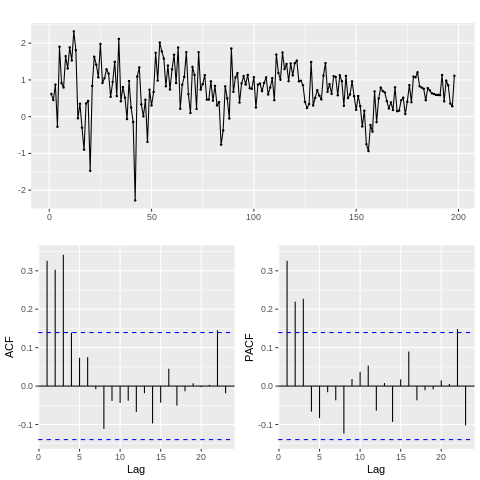

In [38]:
%%R
# Carregamos o pacote fpp3
library(fpp3)

# Selecionamos APENAS a coluna 'Consumption' com o operador $
ggtsdisplay(us_change$Consumption, lag_max = 20)

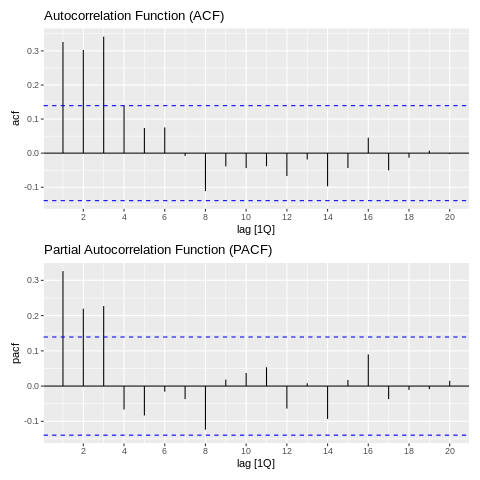

In [37]:
%%R
library(fpp3)

# 1. Calcula a ACF da variável Consumption dentro do tsibble us_change
acf_plot <- us_change %>%
  ACF(Consumption, lag_max = 20) %>%
  autoplot() +
  labs(title = "Autocorrelation Function (ACF)")

# 2. Calcula a PACF da variável Consumption
pacf_plot <- us_change %>%
  PACF(Consumption, lag_max = 20) %>%
  autoplot() +
  labs(title = "Partial Autocorrelation Function (PACF)")

# 3. Usa o patchwork (do fpp3) para mostrar os dois gráficos juntos
acf_plot / pacf_plot

In [36]:
%%R
# Carregamos o pacote fpp3
library(fpp3)

# Exemplo de como seria a sintaxe (NÃO É NECESSÁRIO EXECUTAR PARA ESTE EXERCÍCIO)
us_change_transformado <- us_change %>%
  mutate(
    # Aplicando o logaritmo
    log_consumo = log(Consumption),

    # Aplicando a primeira diferença ao log
    # A função é difference() em vez de diff()
    diff_log_consumo = difference(log_consumo)
  )

# Imprime as primeiras linhas para ver as novas colunas
head(us_change_transformado)

# A tsibble: 6 x 8 [1Q]
  Quarter Consumption Income Production Savings Unemployment log_consumo
    <qtr>       <dbl>  <dbl>      <dbl>   <dbl>        <dbl>       <dbl>
1 1970 Q1       0.619  1.04      -2.45     5.30       0.9        -0.480 
2 1970 Q2       0.452  1.23      -0.551    7.79       0.5        -0.794 
3 1970 Q3       0.873  1.59      -0.359    7.40       0.5        -0.136 
4 1970 Q4      -0.272 -0.240     -2.19     1.17       0.700     NaN     
5 1971 Q1       1.90   1.98       1.91     3.54      -0.1000      0.643 
6 1971 Q2       0.915  1.45       0.902    5.87      -0.1000     -0.0890
# ℹ 1 more variable: diff_log_consumo <dbl>


In addition: Warning message:
There was 1 warning in `mutate()`.
ℹ In argument: `log_consumo = log(Consumption)`.
Caused by warning in `log()`:
! NaNs produced 


### Ex 10

In [40]:
%%R
# Carregamos a biblioteca moderna para séries temporais
library(fpp3)

# Ajustamos o modelo ARIMA automaticamente à série de Consumo
# O fpp3 é inteligente e testa vários modelos para encontrar o melhor
# com base no critério de informação (AICc)
modelo_final <- us_change %>%
  model(ARIMA(Consumption))

# Vamos ver rapidamente qual modelo foi escolhido
report(modelo_final)

Series: Consumption 
Model: ARIMA(1,0,3)(1,0,1)[4] w/ mean 

Coefficients:
          ar1     ma1     ma2     ma3     sar1    sma1  constant
      -0.3413  0.5568  0.3208  0.4084  -0.1459  0.3849    1.1392
s.e.   0.1590  0.1500  0.0922  0.0792   0.2136  0.1806    0.1265

sigma^2 estimated as 0.3324:  log likelihood=-168.58
AIC=353.16   AICc=353.92   BIC=379.46


In addition: Warning message:
`gg_tsresiduals()` was deprecated in feasts 0.4.2.
ℹ Please use `ggtime::gg_tsresiduals()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
generated. 


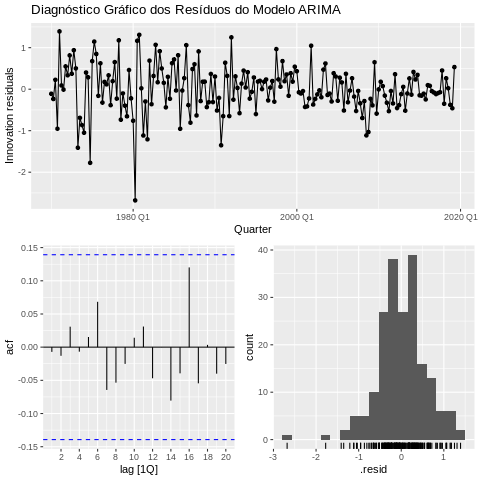

In [41]:
%%R
# Esta função cria os gráficos de resíduos, ACF e histograma de uma vez
gg_tsresiduals(modelo_final, lag_max = 20) +
  labs(title = "Diagnóstico Gráfico dos Resíduos do Modelo ARIMA")

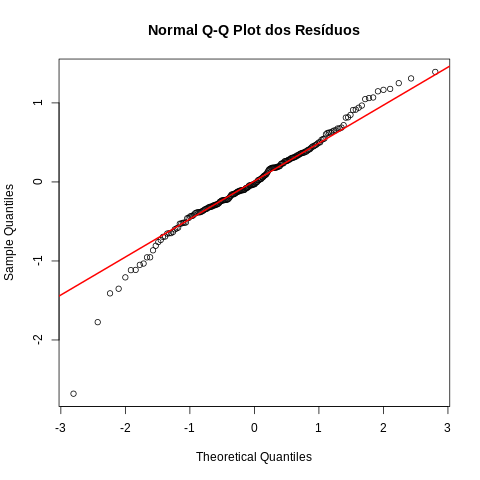

In [42]:
%%R
# Primeiro, extraímos os resíduos do modelo
residuos_df <- residuals(modelo_final)

# Criamos o QQ-Plot
# A função qqnorm plota os quantis, e qqline desenha a linha de referência
qqnorm(residuos_df$.resid, main = "Normal Q-Q Plot dos Resíduos")
qqline(residuos_df$.resid, col = "red", lwd = 2)

In [43]:
%%R
# Extraímos os resíduos
residuos_df <- residuals(modelo_final)

# Realizamos o teste de Ljung-Box nos resíduos
# A função features() é a maneira do fpp3 de calcular estatísticas
residuos_df %>%
  features(.resid, ljung_box, lag = 20)

# A tibble: 1 × 3
  .model             lb_stat lb_pvalue
  <chr>                <dbl>     <dbl>
1 ARIMA(Consumption)    9.58     0.975


In [45]:
%%R
# Instala o pacote se necessário e o carrega
if (!require("tseries")) {
  install.packages("tseries")
}
library(tseries)

# Extrai os resíduos do nosso modelo
residuos_vec <- residuals(modelo_final)$.resid

# Realiza o teste de Jarque-Bera
jarque.bera.test(residuos_vec)


	Jarque Bera Test

data:  residuos_vec
X-squared = 53.87, df = 2, p-value = 2.006e-12

